In [1]:
import flowermd
import hoomd
import gsd
import matplotlib.pyplot as plt
import numpy as np
import freud
import time

/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/mdtraj/formats/__init__.py:13: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  from mdtraj.formats.trr import TRRTrajectoryFile


In [7]:
traj = gsd.hoomd.open('given-pps-cg.gsd')
nematic = freud.order.Nematic()

In [8]:
def nop(frame):
    # Get the positional data of all atoms
    positions = frame.particles.position
    # Get the number of molecules
    molecule_ids = frame.bonds.group
    # Assigning the first atoms position to temp variable
    temp = positions[0]
    # Initialize list of vectors
    vectors = []
    # Loop through all atoms with counter i
    for i, pos in enumerate(positions):
        # Check to see if all atoms have been counted
        if i < len(molecule_ids):
            # Addding the vector difference between current and previous atom positions
            # np.stack allows for them to be treated as arrays
            vectors.append(np.stack(pos) - np.stack(temp))
            # Updating temp variable for the next cycle
            temp = pos
            # Converting the list into an array, ignoring the first one
    vectors = np.array(vectors[1:])
    return vectors

In [23]:
# METHOD 1
# Starting timer to see how long this process takes
start = time.process_time()
orders = []
frames = []
count = 0
# Iterate through every frame in the trajectory
for frame in traj:
    # Appending the count to assign the frame a number
    count += 1
    frames.append(count)
    # Computing the S2 order parameter based off of the nop function of the frame
    nematic.compute(nop(frame))
    # Appending the order of the frame for plotting purposes
    orders.append(nematic.order)
    print("Nematic Order Parameter:", nematic.order)
print("Time taken:", time.process_time() - start, "s")

Nematic Order Parameter: 0.08366385847330093
Nematic Order Parameter: 0.08125422894954681
Nematic Order Parameter: 0.08344503492116928
Nematic Order Parameter: 0.07996775209903717
Nematic Order Parameter: 0.07861026376485825
Nematic Order Parameter: 0.07698453962802887
Nematic Order Parameter: 0.07232198864221573
Nematic Order Parameter: 0.07394231110811234
Nematic Order Parameter: 0.07208936661481857
Nematic Order Parameter: 0.06853335350751877
Nematic Order Parameter: 0.06938223540782928
Nematic Order Parameter: 0.06591778993606567
Nematic Order Parameter: 0.061639755964279175
Nematic Order Parameter: 0.06113794818520546
Nematic Order Parameter: 0.06189383566379547
Nematic Order Parameter: 0.058902766555547714
Nematic Order Parameter: 0.05628734081983566
Nematic Order Parameter: 0.05582909286022186
Nematic Order Parameter: 0.05761820822954178
Nematic Order Parameter: 0.057933609932661057
Nematic Order Parameter: 0.06021536886692047
Nematic Order Parameter: 0.055087361484766006
Nemati

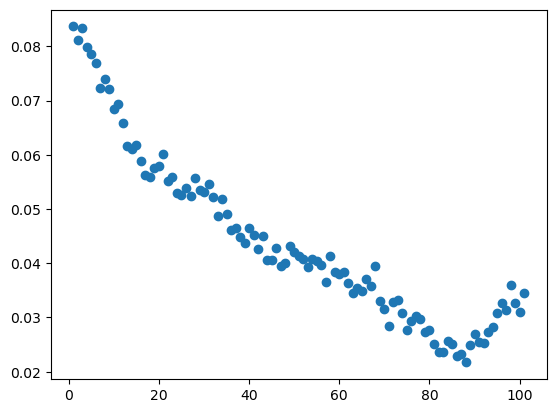

In [24]:
plt.scatter(frames, orders)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")
plt.title("Method 1")

In [9]:
# METHOD 2
orders = []
frames = []
# Starting timer to see how long this process takes
start = time.process_time()
count = 0
# Iterate through every frame in the trajectory
for frame in traj:
    count += 1
    # Appending the count to assign the frame a number
    frames.append(count)
    # Getting the positions of every atom
    positions = frame.particles.position
    # Computing the S2 order parameter based off of that
    nematic.compute(positions)
    # Appending the order of the frame for plotting purposes
    orders.append(nematic.order)
print("Time taken:", time.process_time() - start, "s")

Time taken: 5.971042 s


/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


Text(0.5, 1.0, 'Method 2')

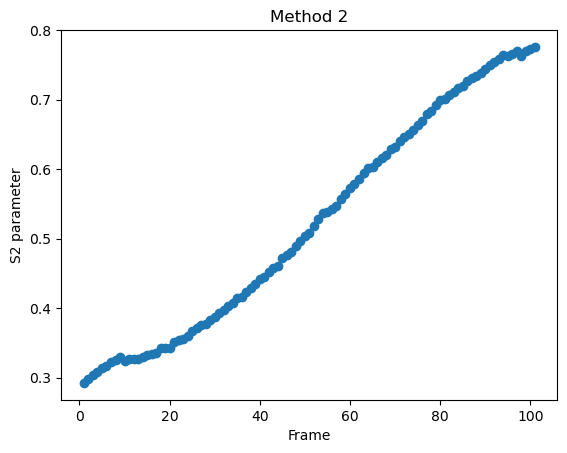

In [10]:
plt.scatter(frames, orders)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")
plt.title("Method 2")